In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1]*history[-i]
    return yhat

def difference(data):
    diff = []
    for i in range(1, len(data)):
        val = data[i] - data[i-1]
        diff.append(val)
    return np.array(diff)

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


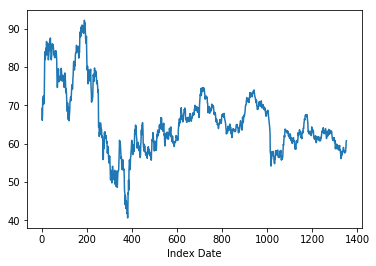

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


>predicted=63.411, expected=63.020
>predicted=63.628, expected=62.891
>predicted=63.349, expected=63.497
>predicted=63.376, expected=62.960
>predicted=63.224, expected=61.649
>predicted=62.832, expected=61.687
>predicted=62.643, expected=61.262
>predicted=62.270, expected=61.308
>predicted=62.025, expected=61.164
>predicted=61.704, expected=61.391
>predicted=61.402, expected=61.853
>predicted=61.479, expected=61.603
>predicted=61.413, expected=62.088
>predicted=61.601, expected=61.550
>predicted=61.599, expected=60.595
>predicted=61.446, expected=60.247
>predicted=61.330, expected=60.504
>predicted=61.075, expected=61.378
>predicted=61.079, expected=61.074
>predicted=60.893, expected=61.781
>predicted=60.979, expected=61.105
>predicted=61.015, expected=61.598
>predicted=61.222, expected=61.416
>predicted=61.423, expected=61.462
>predicted=61.360, expected=61.310
>predicted=61.477, expected=61.150
>predicted=61.312, expected=61.796
>predicted=61.490, expected=60.922
>predicted=61.300, e

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=62.989, expected=63.201
>predicted=63.111, expected=62.865
>predicted=63.063, expected=62.812
>predicted=63.139, expected=63.193
>predicted=63.120, expected=62.637
>predicted=62.999, expected=61.958
>predicted=62.753, expected=61.493
>predicted=62.487, expected=61.204
>predicted=62.172, expected=61.005
>predicted=61.895, expected=60.860
>predicted=61.520, expected=60.822
>predicted=61.223, expected=61.097
>predicted=61.092, expected=61.562
>predicted=61.113, expected=61.112
>predicted=61.062, expected=60.914
>predicted=61.061, expected=61.516
>predicted=61.206, expected=60.624
>predicted=61.074, expected=60.273
>predicted=60.985, expected=60.807
>predicted=60.925, expected=60.342
>predicted=60.679, expected=58.726
>predicted=60.321, expected=59.183
>predicted=60.038, expected=58.718
>predicted=59.627, expected=58.650
>predicted=59.351, expected=59.244
>predicted=59.231, expected=59.892
>predicted=59.068, expected=59.427
>predicted=59.178, expected=59.214
>predicted=59.204, e

In [7]:
#  ARIMA baseline for IBM example stock with rolling window
# p = 5 lag terms, d = 2 (degree of differencing), q = 0 (size of moving average window)
ibm = pd.Series.from_csv('C:/Users/Owner/Documents/IBM_stock.csv', header=0)
ibm.plot()
plt.show()
X = ibm.values
size = len(X) - 150
train,test = X[:size], X[size:]
history = [i for i in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,2,0))
    model_fit = model.fit(trend='nc', disp=False)
    ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
    resid = model_fit.resid
    diff = difference(history)
    yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

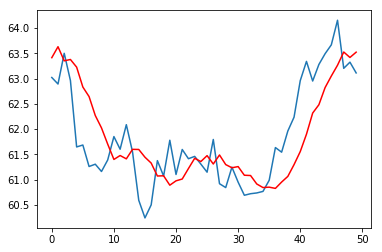

Test RMSE: 0.533


In [8]:
plt.plot(test[:50])
plt.plot(predictions[0:50], color='red')
plt.show()
rmse = sqrt(mean_squared_error(test[0:50], predictions[1:51]))
print('Test RMSE: %.3f' % rmse)